# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [48]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"
units = "imperial"
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")

# Pretty Print the output of the JSON
response = requests.get(url).json()
print(json.dumps(weather_json, indent=4, sort_keys=True))

#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

# Get temperature from JSON response
#temperature = weather_json["main"]["temp"]
#print(f"The temperatue in {city} is {temperature}F")

{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": -0.18,
        "lon": -50.05
    },
    "dt": 1608471955,
    "id": 3385980,
    "main": {
        "feels_like": 92.5,
        "grnd_level": 1010,
        "humidity": 59,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 87.44,
        "temp_max": 87.44,
        "temp_min": 87.44
    },
    "name": "Tucum\u00e3",
    "sys": {
        "country": "BR",
        "sunrise": 1608455645,
        "sunset": 1608499317
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 86,
        "speed": 5.79
    }
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:

#partial url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold the info
#cities = ["London", "Chicago"]
cty = []
lat = []
lon = []
temp = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
rec_count = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cty.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #print(f"city:{city}, lat:{lat}, lon:{lon}, max_temp:{temp_max}, humidity:{humidity}, clouds:{clouds}")
        print(f"Processing Record {rec_count} | Temp in {city} is {temp[rec_count]} ")
        rec_count = rec_count + 1
    except KeyError:
        print(f"Data not found in record:{rec_count}, Skipping...")
        
    

Processing Record 0 | Temp in saint-philippe is 74.19 
Processing Record 1 | Temp in sinnamary is 82.92 
Processing Record 2 | Temp in atuona is 78.37 
Processing Record 3 | Temp in kaeo is 59 
Processing Record 4 | Temp in hobyo is 79.12 
Processing Record 5 | Temp in new norfolk is 48.2 
Processing Record 6 | Temp in lazaro cardenas is 82.65 
Processing Record 7 | Temp in ribeira grande is 66.2 
Processing Record 8 | Temp in hobart is 48.58 
Processing Record 9 | Temp in kapaa is 72.79 
Processing Record 10 | Temp in uhlove is 38.64 
Data not found in record:11, Skipping...
Processing Record 11 | Temp in bengkulu is 74.98 
Processing Record 12 | Temp in ushuaia is 62.6 
Processing Record 13 | Temp in tall kayf is 47.43 
Processing Record 14 | Temp in swift current is 37.4 
Processing Record 15 | Temp in abu samrah is 54.68 
Data not found in record:16, Skipping...
Processing Record 16 | Temp in souillac is 78.8 
Processing Record 17 | Temp in albany is 30.16 
Processing Record 18 | T

Processing Record 153 | Temp in yulara is 71.6 
Processing Record 154 | Temp in hastings is 46.4 
Processing Record 155 | Temp in batagay-alyta is -28.55 
Processing Record 156 | Temp in cape town is 73.13 
Processing Record 157 | Temp in olafsvik is 30.38 
Processing Record 158 | Temp in mehamn is 30.2 
Processing Record 159 | Temp in alyangula is 78.8 
Processing Record 160 | Temp in camana is 72.16 
Processing Record 161 | Temp in dunedin is 52 
Processing Record 162 | Temp in llanes is 57.15 
Processing Record 163 | Temp in kavaratti is 82.02 
Processing Record 164 | Temp in vila franca do campo is 62.6 
Processing Record 165 | Temp in lermontovka is -2.22 
Processing Record 166 | Temp in klaeng is 68.5 
Processing Record 167 | Temp in mahebourg is 78.8 
Processing Record 168 | Temp in moree is 71.6 
Data not found in record:169, Skipping...
Processing Record 169 | Temp in deputatskiy is -26.09 
Processing Record 170 | Temp in san patricio is 59.13 
Processing Record 171 | Temp in 

Processing Record 301 | Temp in gazanjyk is 38.98 
Processing Record 302 | Temp in nagato is 37 
Data not found in record:303, Skipping...
Processing Record 303 | Temp in banda aceh is 78.48 
Processing Record 304 | Temp in salalah is 77 
Processing Record 305 | Temp in brokopondo is 84.38 
Processing Record 306 | Temp in gainesville is 61.3 
Processing Record 307 | Temp in qinhuangdao is 20.98 
Processing Record 308 | Temp in plouzane is 50 
Processing Record 309 | Temp in caranavi is 79.21 
Data not found in record:310, Skipping...
Processing Record 310 | Temp in ambon is 82.45 
Processing Record 311 | Temp in hvolsvollur is 32 
Processing Record 312 | Temp in victoria is 56.79 
Processing Record 313 | Temp in sosnovka is 1.51 
Processing Record 314 | Temp in tambo is 48.94 
Processing Record 315 | Temp in hovd is 4.01 
Processing Record 316 | Temp in hefei is 30.2 
Processing Record 317 | Temp in tabou is 81.66 
Processing Record 318 | Temp in oistins is 84.2 
Processing Record 319 

Processing Record 453 | Temp in moorhead is 27.52 
Processing Record 454 | Temp in beringovskiy is -7.26 
Processing Record 455 | Temp in gboko is 91.04 
Processing Record 456 | Temp in fiumicino is 55.02 
Processing Record 457 | Temp in udachnyy is -32.8 
Processing Record 458 | Temp in ahipara is 60.84 
Data not found in record:459, Skipping...
Processing Record 459 | Temp in ponta delgada is 62.6 
Processing Record 460 | Temp in nikolayevka is 2.57 
Processing Record 461 | Temp in micheweni is 81.1 
Processing Record 462 | Temp in rio grande city is 66.67 
Processing Record 463 | Temp in namatanai is 79.95 
Processing Record 464 | Temp in pangnirtung is 8.04 
Processing Record 465 | Temp in hit is 56.82 
Processing Record 466 | Temp in okha is -10.34 
Processing Record 467 | Temp in sao filipe is 75.33 
Processing Record 468 | Temp in egvekinot is -12.06 
Processing Record 469 | Temp in gravdal is 44.6 
Processing Record 470 | Temp in rio bananal is 87.04 
Processing Record 471 | Te

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [126]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city":cty,
    "lat": lat,
    "lon": lon,
    "MaxTemp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "WindSpeed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
weather_data.to_csv(output_data_file)


In [125]:
weather_data.describe()

,lat,lon,MaxTemp,Humidity,Cloudiness,WindSpeed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.099444,16.188038,51.810972,73.762153,54.392361,8.868698,1.608484e+09
std,33.432666,89.523819,32.564824,18.627722,37.500129,6.306651,7.123488e+01
min,-54.800000,-179.170000,-43.600000,7.000000,0.000000,0.200000,1.608484e+09
25%,-8.675000,-59.717500,32.757500,65.000000,20.000000,4.052500,1.608484e+09
50%,23.715000,17.660000,62.010000,78.000000,62.500000,6.930000,1.608484e+09
75%,48.305000,93.187500,78.487500,88.000000,90.000000,11.990000,1.608484e+09
max,78.220000,179.320000,102.880000,100.000000,100.000000,34.450000,1.608485e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [76]:
weath_df = weather_data[weather_data["Humidity"] <= 100]
weath_df.describe()


,lat,lon,MaxTemp,Humidity,Cloudiness,WindSpeed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.099444,16.188038,51.810972,73.762153,54.392361,8.868698,1.608484e+09
std,33.432666,89.523819,32.564824,18.627722,37.500129,6.306651,7.123488e+01
min,-54.800000,-179.170000,-43.600000,7.000000,0.000000,0.200000,1.608484e+09
25%,-8.675000,-59.717500,32.757500,65.000000,20.000000,4.052500,1.608484e+09
50%,23.715000,17.660000,62.010000,78.000000,62.500000,6.930000,1.608484e+09
75%,48.305000,93.187500,78.487500,88.000000,90.000000,11.990000,1.608484e+09
max,78.220000,179.320000,102.880000,100.000000,100.000000,34.450000,1.608485e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [122]:
import datetime
dt_used = max(date)
#chart_date = print(datetime.datetime.fromtimestamp(dt_used).strftime('%m/%d/%Y'))
chart_date = datetime.datetime.fromtimestamp(dt_used).strftime('%m/%d/%Y')
chart_date

'12/20/2020'

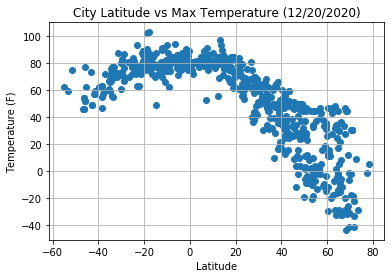

In [127]:
# Build a scatter plot for each data type
plt.scatter(weath_df["lat"], weath_df["MaxTemp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({chart_date})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/TemperatureInWorldCities.png")

# Show plot
plt.show()


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

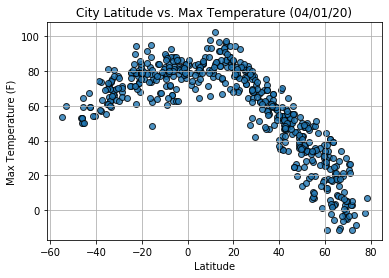

## Latitude vs. Humidity Plot

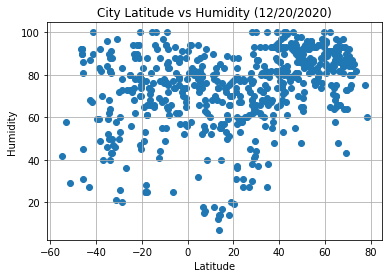

In [128]:
# Build a scatter plot for each data type
plt.scatter(weath_df["lat"], weath_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({chart_date})")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

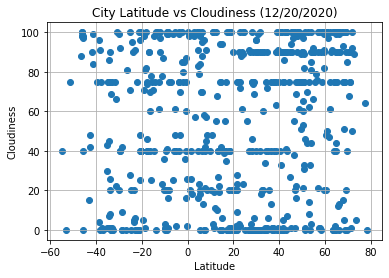

In [129]:
# Build a scatter plot for each data type
plt.scatter(weath_df["lat"], weath_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({chart_date})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

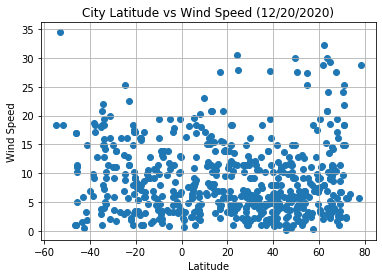

In [130]:
# Build a scatter plot for each data type
plt.scatter(weath_df["lat"], weath_df["WindSpeed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({chart_date})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [131]:
nh_df = weath_df[weath_df["lat"] >= 0]
sh_df = weath_df[weath_df["lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8510792418715457


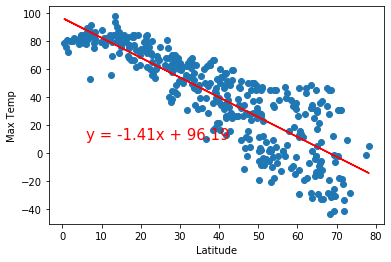

In [132]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = nh_df['lat'].astype('float')
y_values = nh_df['MaxTemp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6555338158013694


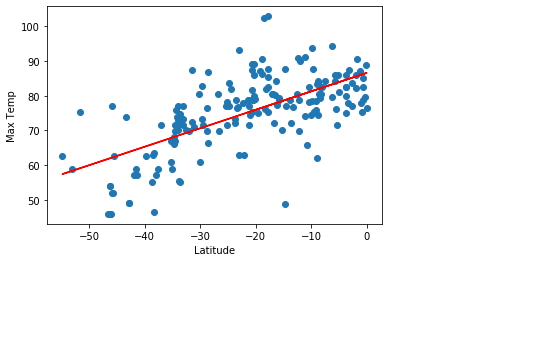

In [133]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = sh_df['lat'].astype('float')
y_values = sh_df['MaxTemp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

    As expected, the further away we are from the Equator, the colder it gets.
    The cities farther away from the Equator in the S. Hemi are not as cold, 
    possibly indicating that the very southern most points are not inhabited.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4091361309665762


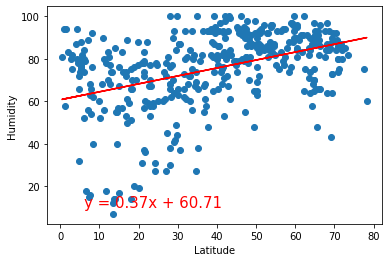

In [134]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = nh_df['lat'].astype('float')
y_values = nh_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13868634773332403


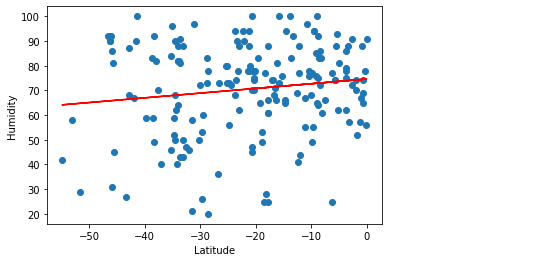

In [135]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = sh_df['lat'].astype('float')
y_values = sh_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

On the surface it appears that since the pct Humidity varies so much, Humidity could be more related to 
other geographic areas such as proximity to water or desert-like conditions

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20922363425127746


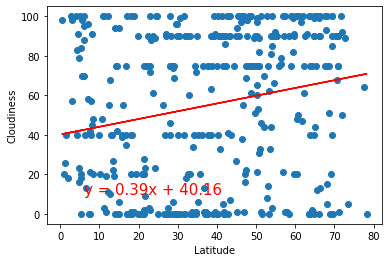

In [136]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = nh_df['lat'].astype('float')
y_values = nh_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08211423792128195


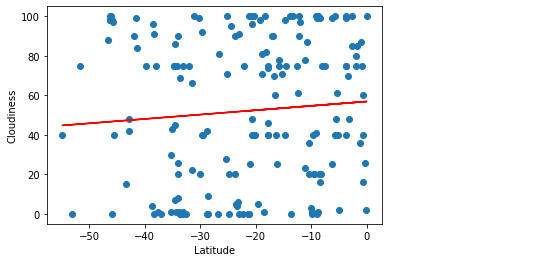

In [137]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = sh_df['lat'].astype('float')
y_values = sh_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

Cloudiness is most likely due to the time of the year. This data was gathered in December and the 
Northern Hemisphere has a higher concentration of Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05924261675956753


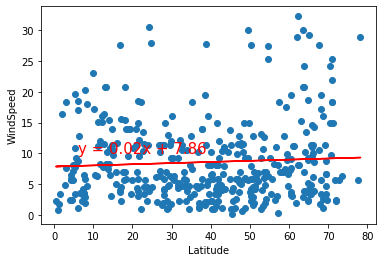

In [138]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = nh_df['lat'].astype('float')
y_values = nh_df['WindSpeed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1813594939418234


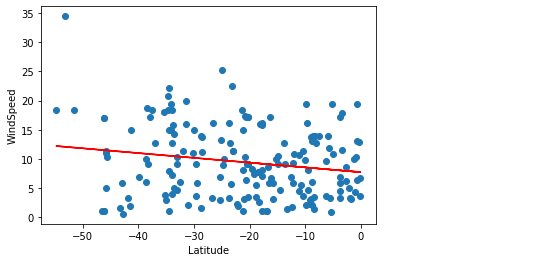

In [139]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = sh_df['lat'].astype('float')
y_values = sh_df['WindSpeed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

Wind speed stays reason